In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [24]:
# Step 1: Generate Sample Data
np.random.seed(42)
data = {
    "CustomerID": range(1, 101),
    "ServiceQuality": np.random.randint(1, 11, size=100),
    "PricingAndPlans": np.random.choice(['Basic', 'Standard', 'Premium'], size=100),
    "ContractualObligations": np.random.choice(['None', '1 Year', '2 Years'], size=100),
    "CompetitorOffers": np.random.randint(0, 2, size=100),
    "CustomerEngagement": np.random.randint(1, 6, size=100),
    "BillingIssues": np.random.randint(0, 2, size=100),
    "ServiceChanges": np.random.randint(0, 2, size=100),
    "CustomerLifecycleStage": np.random.choice(['New', 'Active', 'At-Risk', 'Churned'], size=100),
    "UsagePatterns": np.random.randint(1, 101, size=100),
    "EconomicFactors": np.random.randint(1, 11, size=100),
    "TechnologyTrends": np.random.randint(1, 11, size=100),
    "CustomerSentiment": np.random.randint(1, 6, size=100),
    "Churn": np.random.randint(0, 2, size=100)
}

df = pd.DataFrame(data)


In [47]:
df = pd.DataFrame(data)

In [48]:
df.to_csv("data.csv")

In [26]:
# Step 2: Preprocess the Data
df = pd.get_dummies(df, columns=['PricingAndPlans', 'ContractualObligations', 'CustomerLifecycleStage'], drop_first=True)

X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']


In [27]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [28]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)


In [29]:
import joblib
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [30]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [31]:
# Step 3: Define a function to create the model
def create_model(optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [33]:
# Step 4: Hyperparameter tuning (manually)
best_accuracy = 0
best_params = {}


In [37]:
# Define parameter grid
neurons_options = [16, 32, 64]
optimizers = ['adam', 'rmsprop']
batch_sizes = [5, 10, 20]
epochs_options = [50, 100]
import joblib

# neurons_options = [64]
# optimizers = ['adam']
# batch_sizes = [5]
# epochs_options = [100]

for neurons in neurons_options:
    for optimizer in optimizers:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                # Create model
                model = create_model(optimizer=optimizer, neurons=neurons)
                # Fit model
                model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
                # Evaluate model
                y_pred = (model.predict(X_test) > 0.5).astype("int32")
                accuracy = accuracy_score(y_test, y_pred)
                print(f'Neurons: {neurons}, Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, Accuracy: {accuracy:.4f}')
                # Check if this is the best model so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'neurons': neurons,
                        'optimizer': optimizer,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }



C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Neurons: 16, Optimizer: adam, Batch Size: 5, Epochs: 50, Accuracy: 0.6286


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Neurons: 16, Optimizer: adam, Batch Size: 5, Epochs: 100, Accuracy: 0.7429


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Neurons: 16, Optimizer: adam, Batch Size: 10, Epochs: 50, Accuracy: 0.6857


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Neurons: 16, Optimizer: adam, Batch Size: 10, Epochs: 100, Accuracy: 0.5143


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Neurons: 16, Optimizer: adam, Batch Size: 20, Epochs: 50, Accuracy: 0.3714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Neurons: 16, Optimizer: adam, Batch Size: 20, Epochs: 100, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 5, Epochs: 50, Accuracy: 0.6286


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 5, Epochs: 100, Accuracy: 0.6857


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 10, Epochs: 50, Accuracy: 0.6286


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 10, Epochs: 100, Accuracy: 0.5143


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 20, Epochs: 50, Accuracy: 0.5143


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Neurons: 16, Optimizer: rmsprop, Batch Size: 20, Epochs: 100, Accuracy: 0.5143


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Neurons: 32, Optimizer: adam, Batch Size: 5, Epochs: 50, Accuracy: 0.6571


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Neurons: 32, Optimizer: adam, Batch Size: 5, Epochs: 100, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Neurons: 32, Optimizer: adam, Batch Size: 10, Epochs: 50, Accuracy: 0.6571


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Neurons: 32, Optimizer: adam, Batch Size: 10, Epochs: 100, Accuracy: 0.5429


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Neurons: 32, Optimizer: adam, Batch Size: 20, Epochs: 50, Accuracy: 0.4286


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Neurons: 32, Optimizer: adam, Batch Size: 20, Epochs: 100, Accuracy: 0.6000


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 5, Epochs: 50, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 5, Epochs: 100, Accuracy: 0.5429


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 10, Epochs: 50, Accuracy: 0.4857


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 10, Epochs: 100, Accuracy: 0.6000


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 20, Epochs: 50, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Neurons: 32, Optimizer: rmsprop, Batch Size: 20, Epochs: 100, Accuracy: 0.7143


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Neurons: 64, Optimizer: adam, Batch Size: 5, Epochs: 50, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Neurons: 64, Optimizer: adam, Batch Size: 5, Epochs: 100, Accuracy: 0.6571


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Neurons: 64, Optimizer: adam, Batch Size: 10, Epochs: 50, Accuracy: 0.6571


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Neurons: 64, Optimizer: adam, Batch Size: 10, Epochs: 100, Accuracy: 0.6000


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Neurons: 64, Optimizer: adam, Batch Size: 20, Epochs: 50, Accuracy: 0.6000


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Neurons: 64, Optimizer: adam, Batch Size: 20, Epochs: 100, Accuracy: 0.6571


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 5, Epochs: 50, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 5, Epochs: 100, Accuracy: 0.5429


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 10, Epochs: 50, Accuracy: 0.4857


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 10, Epochs: 100, Accuracy: 0.5714


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 20, Epochs: 50, Accuracy: 0.6857


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Neurons: 64, Optimizer: rmsprop, Batch Size: 20, Epochs: 100, Accuracy: 0.6000


In [38]:
# Print best parameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'neurons': 16, 'optimizer': 'adam', 'batch_size': 5, 'epochs': 100}
Best Accuracy: 0.7428571428571429


In [39]:
# Step 5: Final evaluation using the best model
best_model = create_model(optimizer=best_params['optimizer'], neurons=best_params['neurons'])
best_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=0)

y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Confusion Matrix:
 [[14  5]
 [ 5 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.69      0.69      0.69        16

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



In [68]:
pred = (best_model.predict(x_0) > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [69]:
print(pred)

[[0]]


In [40]:
# Save the best model
best_model.save('best_customer_churn_model_nn.h5')


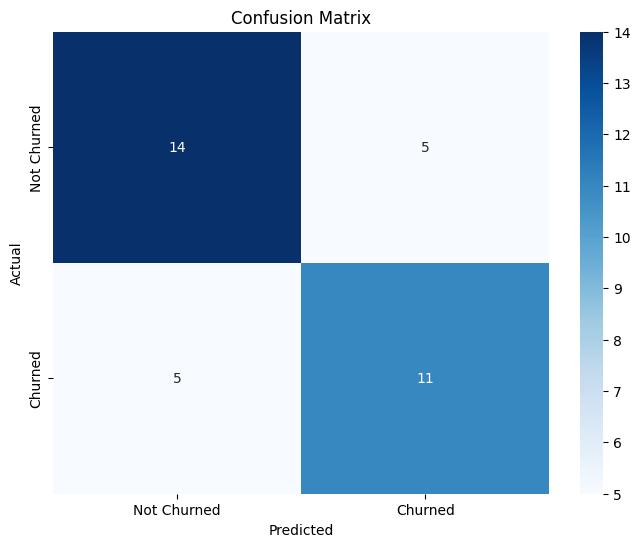

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()



<Figure size 1000x600 with 0 Axes>

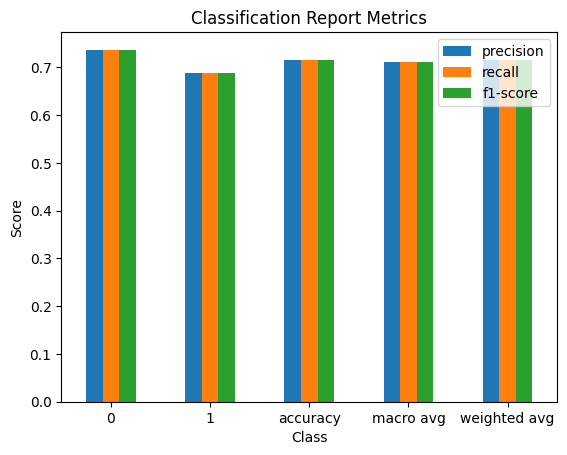

In [46]:
# Plotting the classification metrics
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
